In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the first dataset
course_problem = pd.read_csv("/kaggle/input/filter-course-by-problem-1/count_course_problem.csv")
course_problem

,course_id,count_course_id
0,C_707456,174712
1,C_2286754,143147
2,C_797404,126977
3,C_1794790,87057
4,C_1822804,84596
...,...,...
558,C_948141,1
559,C_735357,1
560,C_707054,1
561,C_2328554,1


In [3]:
# Load the first dataset
course_problem = pd.read_csv("/kaggle/input/filter-course-by-problem-2/count_course_problem.csv")
course_problem

,course_id,count_course_id
0,C_2287011,149183
1,C_737592,84758
2,C_949542,84659
3,C_682392,44368
4,C_823327,37435
...,...,...
806,C_2221589,1
807,C_681066,1
808,C_1755917,1
809,C_735093,1


In [4]:
# Load the first dataset
course_problem = pd.read_csv("/kaggle/input/filter-course-by-problem-1/count_course_problem.csv")

# Loop through the remaining files and concatenate them
for i in range(1, 10):
    course_problem_add = pd.read_csv(f'/kaggle/input/filter-course-by-problem-{i+1}/count_course_problem.csv')
    course_problem = pd.concat([course_problem, course_problem_add], ignore_index=True)
    
# Display the resulting DataFrame
course_problem

,course_id,count_course_id
0,C_707456,174712
1,C_2286754,143147
2,C_797404,126977
3,C_1794790,87057
4,C_1822804,84596
...,...,...
6389,C_1755907,1
6390,C_1766166,1
6391,C_2226108,1
6392,C_947794,1


In [5]:
# Group by course_id and sum the count_course_id
course_problem_grouped = course_problem.groupby("course_id", as_index=False)["count_course_id"].sum()

# Display the result
course_problem_grouped

,course_id,count_course_id
0,C_1017355,83542
1,C_1017419,8502
2,C_1025064,6595
3,C_1025076,1041
4,C_1025079,133
...,...,...
1189,C_948488,31982
1190,C_949439,372
1191,C_949541,6074
1192,C_949542,145015


In [6]:
course_problem_grouped['count_course_id'].value_counts()

count_course_id
1         23
5         13
13        12
4         12
3         11
          ..
8346       1
72508      1
277        1
4582       1
145015     1
Name: count, Length: 813, dtype: int64

In [7]:
course_problem_grouped['count_course_id'].value_counts().sort_index()

count_course_id
1          23
2           9
3          11
4          12
5          13
           ..
414562      1
470213      1
597482      1
1341980     1
3315796     1
Name: count, Length: 813, dtype: int64

In [8]:
course_problem_grouped['count_course_id'].describe()

count    1.194000e+03
mean     1.238892e+04
std      1.092369e+05
min      1.000000e+00
25%      6.425000e+01
50%      3.660000e+02
75%      2.894500e+03
max      3.315796e+06
Name: count_course_id, dtype: float64

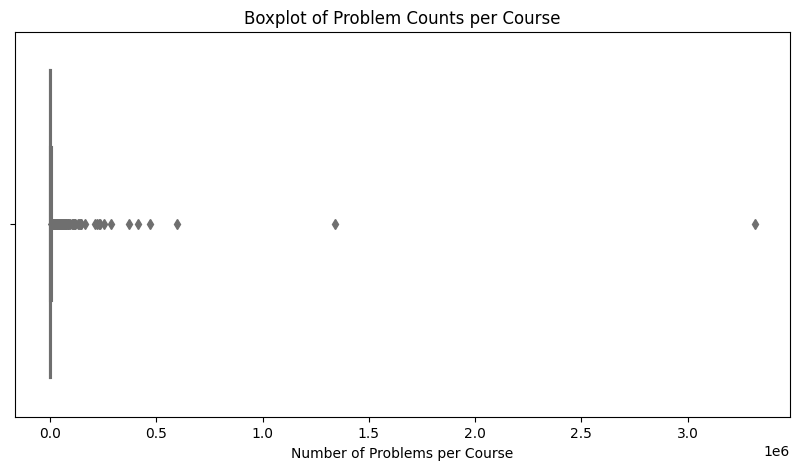

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=course_problem_grouped['count_course_id'], color='skyblue')

plt.xlabel('Number of Problems per Course')
plt.title('Boxplot of Problem Counts per Course')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

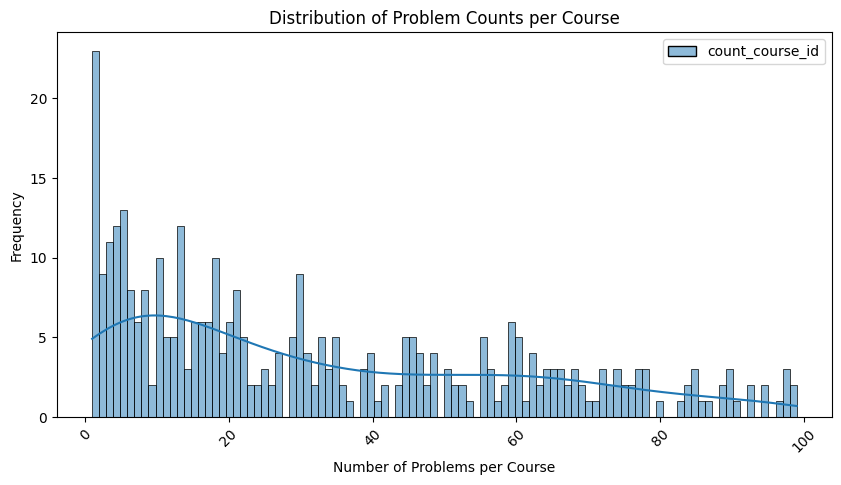

In [10]:
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.histplot(course_problem_grouped[course_problem_grouped['count_course_id']<100], bins=100, kde=True, color="blue")
# Labels and title
plt.xlabel('Number of Problems per Course')
plt.ylabel('Frequency')
plt.title('Distribution of Problem Counts per Course')

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [11]:
course_problem_grouped_limit = course_problem_grouped[course_problem_grouped['count_course_id']>10]

In [12]:
course_info = pd.read_csv("/kaggle/input/filter-course-by-info/course_info.csv")
course_info

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource
0,C_655852,系列课-已结课无回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一周 绪论', '开场白', '开场白'], 'resourc..."
1,C_655850,系列课-开课未开始,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第0章 Web前端技术概述', '0.1 Web诞生史', 'W..."
2,C_654554,系列课-开课中,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['绪章 文化与文明概述', '0.1 导学', '导学'], 'r..."
3,C_654506,系列课-开课已结束有回顾时长,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,[{'titles': ['学习贯彻“十九大精神”-引领中国特色社会主义进入新时代的政治宣言...
4,C_629558,医学免疫学与病原生物学,[],0,[],0,目前数据科学和人工智能的人才缺口空前之大，人们对AI相关知识的学习需求也大大增加。 本课程主...,"[{'titles': ['第一章 医学免疫学绪论', '谈谈免疫', 'Video'],..."
...,...,...,...,...,...,...,...,...
3010,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系..."
3011,C_2342532,Fundamentals of Circuit Analysis,[],0,"['Advanced Mathematics (1) ', 'Linear Algebra'...",3,Want to learn Fundamentals of Circuit Analysis...,[{'titles': ['Chapter1 Basic Laws of Circuits'...
3012,C_2343056,运动训练基本原理与方法,[],0,"['先修运动训练学', '运动解剖学', '运动生理学', '运动医学等基础课程。\t']",4,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训..."
3013,C_2343522,高等飞行动力学,[],0,"['飞行动力学', '自动控制原理']",2,评估飞机设计方案需要学什么？飞行动力学。 \n评估现代飞机设计方案需要学什么？高等飞行动力学。,"[{'titles': ['第1章 课程概述', '1.1 课程概述', '1.1.2 视频..."


In [13]:
# Merge the grouped course data with another DataFrame (replace 'other_df' with your actual DataFrame)
course_info_limit = course_info.merge(course_problem_grouped_limit, on="course_id", how="inner")

# Display the merged DataFrame
course_info_limit

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id
0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183
1,C_674971,宝玉石鉴赏,[],0,[],0,【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。《宝玉石鉴赏》让你了解宝石的自然...,"[{'titles': ['第一讲 序言', '1.1 宝玉石的基本概念、属性和种类', '...",23573
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090
4,C_676705,民法与生活,['法学'],1,['无'],1,本课程是一门面向非法学专业学生及社会人士修读的法律类课程。民法源于生活，人的一生无时无刻不与...,"[{'titles': ['绪论', '绪论', 'Video'], 'resource_i...",274
...,...,...,...,...,...,...,...,...,...
1087,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67
1088,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90
1089,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",488
1090,C_2343056,运动训练基本原理与方法,[],0,"['先修运动训练学', '运动解剖学', '运动生理学', '运动医学等基础课程。\t']",4,运动训练基本原理与方法是体育学的专业核心课程，通过该课程的学习，学生不仅能够掌握运动训练的基...,"[{'titles': ['一、基础理论', '1.运动训练学及其理论体系', '1.运动训...",154


In [14]:
course_info_limit.to_csv("course_info_limit.csv", index = False)